Mahan Madani - 99222092
Assignment 4 - Credit Card Transactions Fraud Dataset

## Load Dataset and analyze data

In [57]:
# Load basic libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, roc_curve

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
df_train = pd.read_csv("fraudTrain.csv", parse_dates=['trans_date_trans_time', 'dob'])
df_test = pd.read_csv("fraudTest.csv", parse_dates=['trans_date_trans_time', 'dob'])
print(df_train.columns)
print(df_train.shape)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')
(1296675, 23)


In [3]:
train_fraud = df_train['is_fraud']
test_fraud = df_test['is_fraud']

In [4]:
pd.set_option('display.max_columns', 50)
df_train.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [5]:
df_train.describe(include=['object'])

,merchant,category,first,last,gender,street,city,state,job,trans_num
count,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675
unique,693,14,352,481,2,983,894,51,494,1296675
top,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,0069 Robin Brooks Apt. 695,Birmingham,TX,Film/video editor,0b242abb623afc578575680df30655b9
freq,4403,131659,26669,28794,709863,3123,5617,94876,9779,1


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

## Basic Data Analysis



<h4>Handle Null Values</h4>

In [7]:
null_counts = df_train.isnull().sum()
null_table = pd.DataFrame(null_counts, columns=["Null Count"])
null_table

,Null Count
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [4]:
df_train.drop('Unnamed: 0', axis=1, inplace=True)
df_test.drop('Unnamed: 0', axis=1, inplace=True)


## Feature Engineering



In [5]:
test_start_index = 1296675

df = pd.concat([df_train, df_test])
df.reset_index(drop=True, inplace=True)
df.shape

(1852394, 22)

Time related features:

In [6]:
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day'] = df['trans_date_trans_time'].dt.day
df['hour'] = df['trans_date_trans_time'].dt.hour

Identifying transactions occured during odd hours:

(Between 22 and 6)

In [7]:
df['odd_hours'] = 0
df.loc[df.hour < 6,'odd_hours'] = 1
df.loc[df.hour > 22,'odd_hours'] = 1

Represent gender with numeric values:

In [8]:
df['gender_binary'] = df['gender'].replace({'M': 0, 'F': 1})

Credit card owner's age:

In [9]:
df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days // 365

In [10]:
df_train = df[:test_start_index]
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_lat,merch_long,is_fraud,year,month,day,hour,odd_hours,gender_binary,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.011293,-82.048315,0,2019,1,1,0,1,1,30
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,49.159047,-118.186462,0,2019,1,1,0,1,1,40


## Visualization

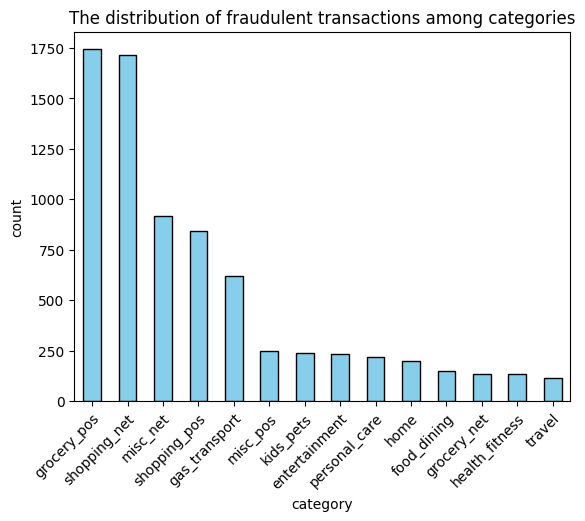

In [43]:
df_train[df_train['is_fraud'] == 1]['category'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('The distribution of fraudulent transactions among categories')
plt.ylabel('count')
plt.xlabel('category')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

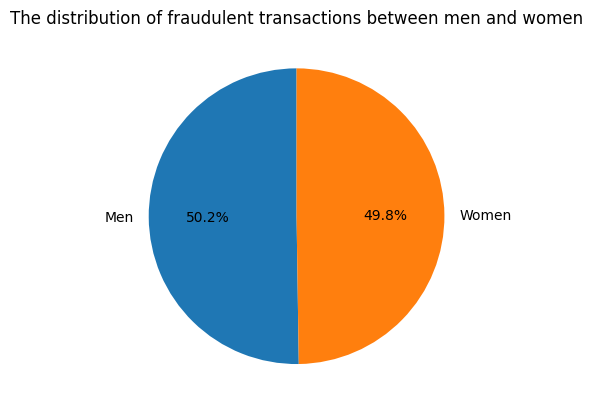

In [44]:
df_train[df_train['is_fraud'] == 1]['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['Men', 'Women'])

plt.title('The distribution of fraudulent transactions between men and women')
plt.ylabel('')
plt.show()

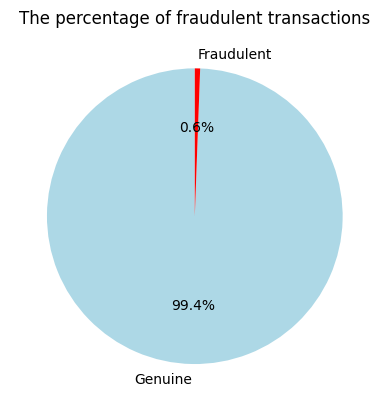

In [45]:
df_train['is_fraud'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['Genuine', 'Fraudulent'], colors=['lightblue', 'red'])

plt.title('The percentage of fraudulent transactions')
plt.ylabel('')
plt.show()

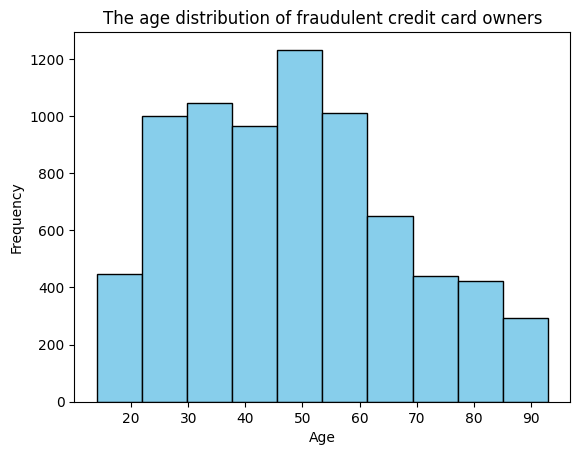

In [15]:
df_train[df_train['is_fraud'] == 1]['age'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')

plt.title('The age distribution of fraudulent credit card owners')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

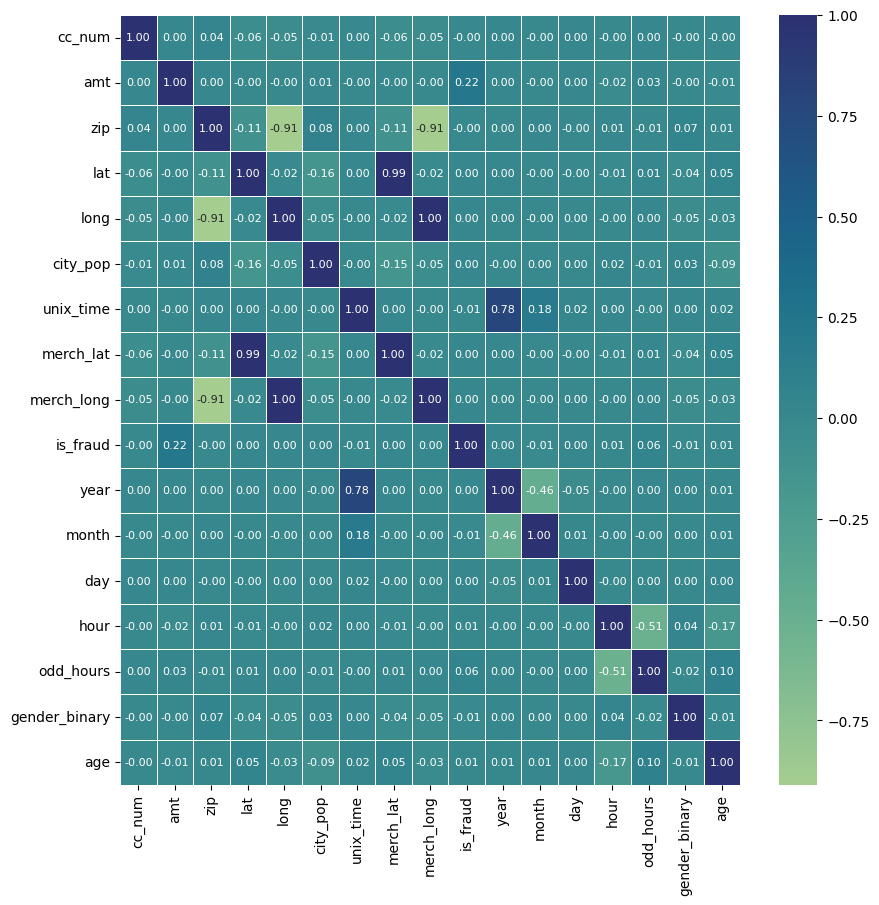

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap='crest', fmt='.2f', linewidths=0.5, annot_kws={"size": 8})
plt.show()

## Feature transformation

Categorical features must be one-hot encoded where possible.

In [11]:
# Use One-hot encoding for Category (14 categories)
encoded_category = pd.get_dummies(df['category'], prefix='category')

# Use One-hot encoding for State (51 states)
# encoded_state = pd.get_dummies(df['state'], prefix='state')

In [12]:
# Scale numerical features
numerical_data = df.select_dtypes(include='number')
numerical_data.drop('is_fraud', axis=1, inplace=True)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_data)
numerical_data = pd.DataFrame(scaled_features, columns=numerical_data.columns)

In [13]:
numerical_data.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,year,month,day,hour,odd_hours,gender_binary,age
0,-0.316766,-0.408741,-0.749921,-0.485167,0.658263,-0.282429,-1.830067,-0.495080,0.594463,-1.001455,-1.796249,-1.67309,-1.878901,1.740624,0.908554,-0.906621
1,-0.318830,0.233378,1.872891,2.040531,-2.035415,-0.293527,-1.830065,2.080082,-2.031915,-1.001455,-1.796249,-1.67309,-1.878901,1.740624,0.908554,-0.332698
2,-0.318801,0.942184,1.281116,0.718034,-1.602731,-0.280243,-1.830065,0.903268,-1.593535,-1.001455,-1.796249,-1.67309,-1.878901,1.740624,-1.100650,0.585580
3,-0.316131,-0.157381,0.402455,1.516580,-1.591951,-0.287590,-1.830063,1.663928,-1.623084,-1.001455,-1.796249,-1.67309,-1.878901,1.740624,-1.100650,0.356011
4,-0.318544,-0.176470,-0.906942,-0.023388,0.783024,-0.293693,-1.830057,0.026642,0.842714,-1.001455,-1.796249,-1.67309,-1.878901,1.740624,-1.100650,-0.791836


Combine numerical features with encoded features:

In [14]:
combined_features = pd.concat([
    numerical_data,
    encoded_category,
    # encoded_state
    ], axis=1)

In [15]:
combined_features.shape

(1852394, 30)

In [16]:
df_train = combined_features[:test_start_index]
df_test = combined_features[test_start_index:]

del numerical_data
del combined_features
del df

## Machine Learning Models

#### Function to test the accuracy of the model

In [17]:
def test_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_probability = model.predict_proba(x_test)[:, 1]  # Probability of class 1

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy: >.6}")

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=[8,3])
    plt.subplot(1, 2, 1)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest', cbar=False, linewidths=1,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])

    plt.title('Confusion Matrix')

    # Calculate AUC
    auc = roc_auc_score(y_test, y_pred_probability)
    print(f"AUC: {auc: >.6}")
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    print(f"F1 Score: {f1: >.6}")

    # Plot the ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability)

    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

#### 1. Logistic Regression Classifier

In [21]:
def logisitic_regression_classifier(x_train, y_train):
    model = LogisticRegression(random_state=42)
    model.max_iter = 1000
    model.fit(x_train, y_train)
    
    return model

In [22]:
x_train, x_test, y_train, y_test = train_test_split(df_train, train_fraud, test_size=0.2, random_state=42)
LR_classifier = logisitic_regression_classifier(x_train, y_train)

Test the model on the train Dataset

Accuracy: 0.994363
AUC: 0.884959
F1 Score: 0.190476


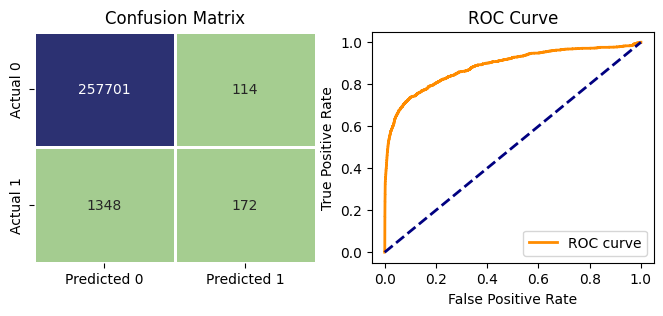

In [23]:
test_model(LR_classifier, x_test, y_test)

Test the model on the test dataset:

Accuracy: 0.996043
AUC: 0.868663
F1 Score: 0.139335


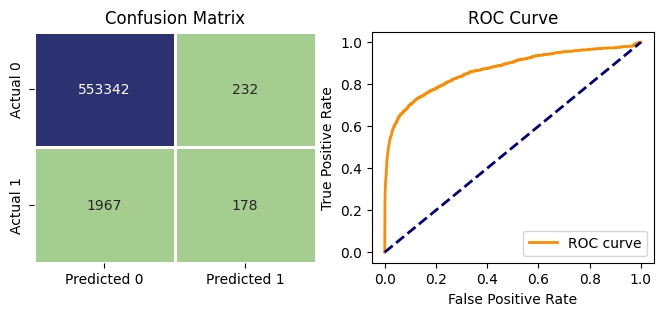

In [24]:
test_model(LR_classifier, df_test, test_fraud)

#### 2. Support Vector Machine Classifier

In [35]:
def support_vector_classifier(x_train, y_train):
    model = SVC(kernel='rbf', C=1.0, probability=True)
    model.fit(x_train, y_train)
    
    return model

In [36]:
x_train, x_test, y_train, y_test = train_test_split(df_train[:20000], train_fraud[:20000], test_size=0.2, random_state=42)
SVM_classifier = support_vector_classifier(x_train, y_train)

Test the model on the train Dataset

Accuracy: 0.9965
AUC: 0.990538
F1 Score: 0.65


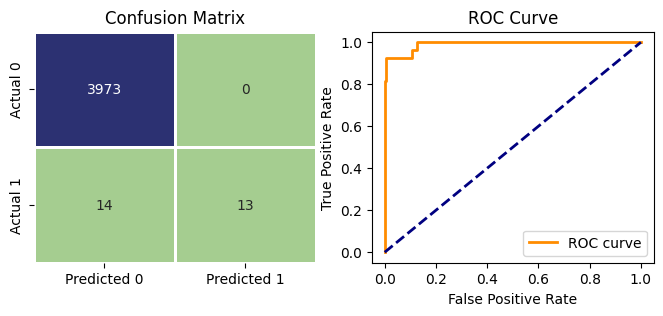

In [37]:
test_model(SVM_classifier, x_test, y_test)

Test the model on the test dataset:

Accuracy: 0.996298
AUC: 0.83602
F1 Score: 0.0812863


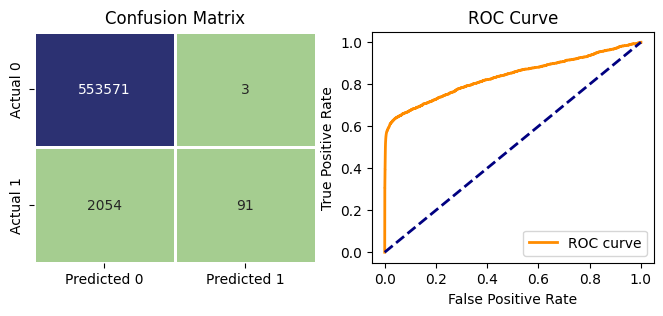

In [38]:
test_model(SVM_classifier, df_test, test_fraud)

#### 3. K-nearest neighbor (KNN) Classifier

In [18]:
def knn_classifier(x_train, y_train):
    model = KNeighborsClassifier(n_neighbors=10)
    model.fit(x_train, y_train)
    
    return model

In [22]:
x_train, x_test, y_train, y_test = train_test_split(df_train[:100000], train_fraud[:100000], test_size=0.2, random_state=42)
KNN_classifier = knn_classifier(x_train, y_train)

Test the model on the train Dataset

Accuracy: 0.99375
AUC: 0.904991
F1 Score: 0.590164


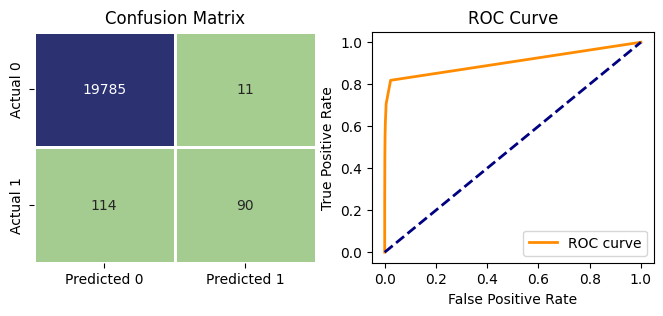

In [23]:
test_model(KNN_classifier, x_test, y_test)

Test the model on the test dataset:

Accuracy: 0.99693
AUC: 0.810707
F1 Score: 0.466875


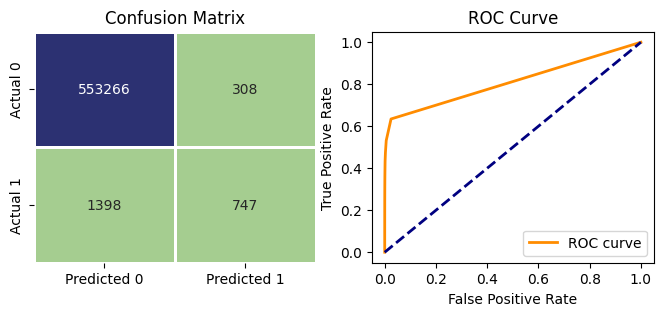

In [24]:
test_model(KNN_classifier, df_test, test_fraud)

#### 4. Decision Tree Classifier

In [25]:
def decision_tree_classifier(x_train, y_train):
    model = DecisionTreeClassifier(random_state=42)
    model.fit(x_train, y_train)
    
    return model

In [32]:
x_train, x_test, y_train, y_test = train_test_split(df_train, train_fraud, test_size=0.2, random_state=42)
tree_classifier = decision_tree_classifier(x_train, y_train)

Test the model on the train Dataset

Accuracy: 0.997868
AUC: 0.914559
F1 Score: 0.820279


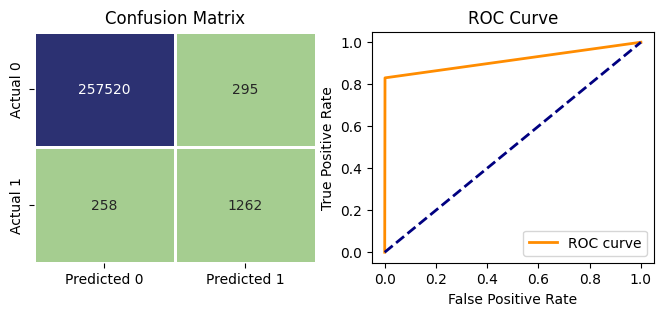

In [33]:
test_model(tree_classifier, x_test, y_test)

Test the model on the test dataset:

Accuracy: 0.996541
AUC: 0.888899
F1 Score: 0.635294


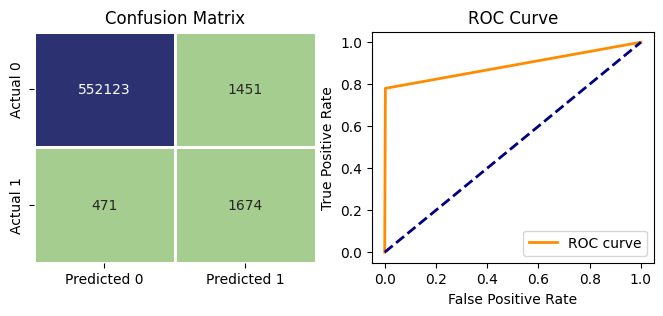

In [34]:
test_model(tree_classifier, df_test, test_fraud)

#### 5. Random Forest Classifier

In [43]:
def random_forest_classifier(x_train, y_train):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(x_train, y_train)
    
    return model

In [51]:
x_train, x_test, y_train, y_test = train_test_split(df_train, train_fraud, test_size=0.2, random_state=42)
forest_classifier = random_forest_classifier(x_train, y_train)

Test the model on the train Dataset

Accuracy: 0.998477
AUC: 0.991849
F1 Score: 0.853541


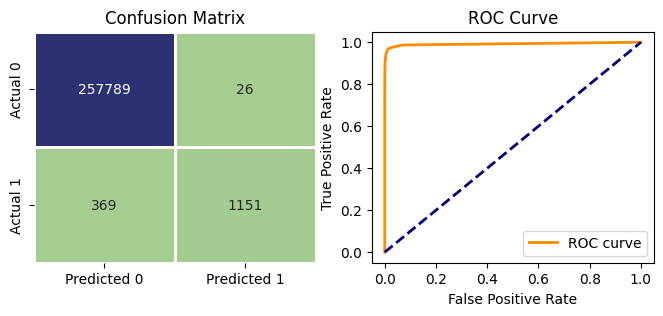

In [53]:
test_model(forest_classifier, x_test, y_test)

Test the model on the test dataset:

Accuracy: 0.998681
AUC: 0.9801
F1 Score: 0.801193


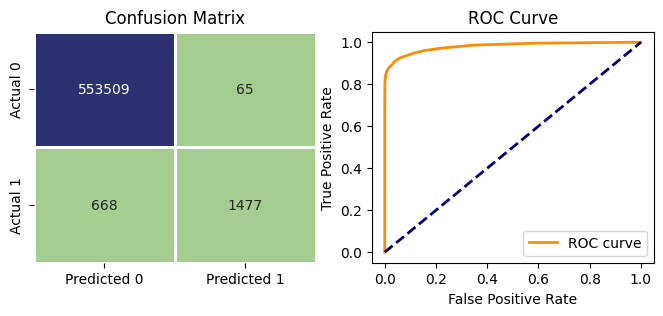

In [54]:
test_model(forest_classifier, df_test, test_fraud)

#### 6. Naive Bayes

In [58]:
def naive_bayes_classifier(x_train, y_train):
    model = GaussianNB()
    model.fit(x_train, y_train)
    
    return model

In [65]:
x_train, x_test, y_train, y_test = train_test_split(df_train, train_fraud, test_size=0.2, random_state=42)
nb_classifier = naive_bayes_classifier(x_train, y_train)

Test the model on the train Dataset

Accuracy: 0.876149
AUC: 0.835145
F1 Score: 0.0625201


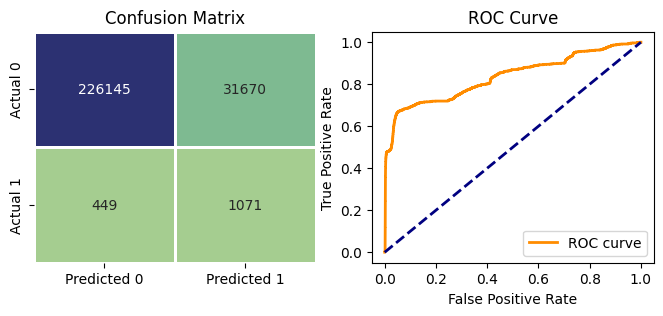

In [66]:
test_model(nb_classifier, x_test, y_test)

Test the model on the test dataset:

Accuracy: 0.869274
AUC: 0.811384
F1 Score: 0.0384631


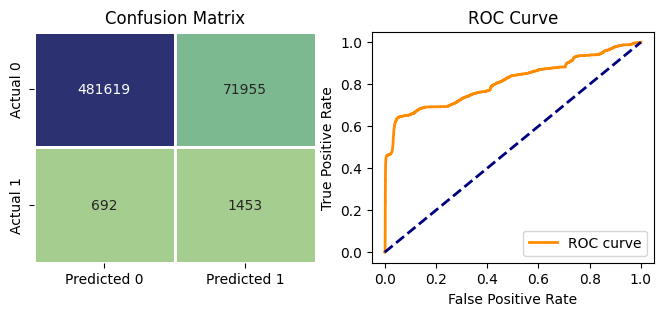

In [67]:
test_model(nb_classifier, df_test, test_fraud)